In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree

# sklearn-鸢尾花（iris）数据集

## 加载数据集

 iris数据集

鸢尾花（iris）数据集是一个经典数据集，在统计学习和机器学习领域都经常被用作示例。数据集内包含 3 类共 150 条记录，每类各 50 个数据，每条记录都有 4 项特征：花萼长度、花萼宽度、花瓣长度、花瓣宽度，可以通过这4个特征预测鸢尾花卉属于（iris-setosa, iris-versicolour, iris-virginica）中的哪一品种。

In [ ]:
# 加载数据集
data = load_iris()

了解数据

In [ ]:
print(data.DESCR)

In [ ]:
data.target_names

In [ ]:
type(data.data),type(data.target),len(data.data),len(data.target)

In [ ]:
# 转换成.DataFrame形式
df = pd.DataFrame(data.data, columns=data.feature_names)

In [ ]:
# 添加品种列
df["Species"] = data.target

In [ ]:
# 查看数据集信息
print(f"数据集信息:\n{df.info()}")

In [ ]:
# 查看前5条数据
df.head()

In [ ]:
# 查看各特征列的摘要信息
df.describe()

In [ ]:
# 设置颜色主题
antV = ['#1890FF', '#2FC25B', '#FACC14', '#223273', '#8543E0', '#13C2C2', '#3436c7', '#F04864'] 
# 绘制violinplot
f, axes = plt.subplots(2,2,figsize=(8,8), sharex=True)
# 删除上方和右方坐标轴上不需要的边框，这在matplotlib中是无法通过参数实现的
sns.despine(left=True)
sns.violinplot(x="Species", y=df.columns[0], data=df, palette=antV, ax=axes[0,0])
sns.violinplot(x="Species", y=df.columns[1], data=df, palette=antV, ax=axes[0,1])
sns.violinplot(x="Species", y=df.columns[2], data=df, palette=antV, ax=axes[1,0])
sns.violinplot(x="Species", y=df.columns[3], data=df, palette=antV, ax=axes[1,1])
plt.show()
# 绘制pointplot
f, axes = plt.subplots(2,2, figsize=(8,6), sharex=True)
sns.despine(left=True)
sns.pointplot(x="Species", y=df.columns[0], data=df, color=antV[1], ax=axes[0, 0])
sns.pointplot(x='Species', y=df.columns[1], data=df, color=antV[1], ax=axes[0, 1])
sns.pointplot(x='Species', y=df.columns[2], data=df, color=antV[1], ax=axes[1, 0])
sns.pointplot(x='Species', y=df.columns[3], data=df, color=antV[1], ax=axes[1, 1])
plt.show()


In [ ]:
data.target[45:55]

In [ ]:
# 用数值替代品种名作为标签
target = np.unique(data.target)
target_names = np.unique(data.target_names)
targets = dict(zip(target, t’ arget_names))
df["Species"] = df["Species"].replace(targets)

In [ ]:
targets

In [ ]:
df["Species"]

In [ ]:
# 提取数据和标签
X = df.drop(columns="Species")
y = df["Species"]
feature_names = X.columns
labels = y.unique()

### 最终代码

In [ ]:
# 加载数据集
data = load_iris() 
# 转换成.DataFrame形式
df = pd.DataFrame(data.data, columns = data.feature_names)
# 添加品种列
df['Species'] = data.target

# 用品种名替代数值作为标签
target = np.unique(data.target)
target_names = np.unique(data.target_names)
targets = dict(zip(target, target_names))
df['Species'] = df['Species'].replace(targets)

# 提取数据和标签
X = df.drop(columns="Species")
y = df["Species"]
feature_names = X.columns
labels = y.unique()

## 决策树

In [ ]:
# 划分数据集
X_train, test_x, y_train, test_lab = train_test_split(X, y, test_size=0.4, random_state=42)
# 创建模型
model = DecisionTreeClassifier(max_depth=3, random_state=42)
# 训练模型
model.fit(X_train, y_train)


In [ ]:
y_pred = model.predict(data.data)
target_dict = {}
for i,name in enumerate(data.target_names):
    target_dict[name] = i
y_predict = [target_dict[k] for k in y_pred]
print(y_predict)


In [ ]:
print(data.target)

In [ ]:
target_dict

In [ ]:
help(dict)

### 可视化决策树的方式

#### 以文字形式输出树

In [ ]:
# 以文字形式输出树 
text_representation = tree.export_text(model)
print(text_representation)

#### plot_tree

In [ ]:
# 用图片画出:plot_tree
plt.figure(figsize=(30,10), facecolor="g")
a = tree.plot_tree(model, feature_names=feature_names, class_names=labels, rounded=True, filled=True, fontsize=14)
plt.show()

#### graphviz模块

该模块需要安装graphviz，推荐在ubuntu上```sudo apt install graphviz```或者Mac上```brew install graphviz```

https://zhuanlan.zhihu.com/p/268532582

In [ ]:
graphviz??

In [ ]:
import graphviz
# 通过export_graphviz()方法将之前搭建的决策树模型model转换为字符串格式并赋值给dot_data，
# 其中注意需要设定out_file参数为None，这样获得的才是字符串格式
dot_data = tree.export_graphviz(model, out_file=None, feature_names=data.feature_names, class_names=data.target_names, filled=True)
# 将dot_data转换成可视化的格式
graph = graphviz.Source(dot_data, format="png")
graph

In [ ]:
# dot_data就是字符串格式
dot_data

#### dtreeviz模块

dtreevizd的y_data需要输入数值，所以前面的数据预处理不合适，这里重新进行了数据集处理

In [ ]:
import dtreeviz

In [ ]:
dtreeviz??

In [ ]:
from dtreeviz.trees import *

# 准备数据
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 拟合
clf = tree.DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)
# dtreevizd的y_data需要输入数值，所以前面的数据预处理不合适，这里重新进行了数据集处理
viz = dtreeviz(clf, 
               x_data=X_train,
               y_data=y_train,
               target_name='class',
               feature_names=data.feature_names, 
               class_names=list(data.target_names), 
               title="Decision Tree - Iris data set")
viz

## 预测

#### sns.heatmap可视化报告

In [ ]:
from sklearn.metrics import classification_report


In [ ]:
y_pred = model.predict(test_x)
# clf_report是字符串描述
clf_report = classification_report(test_lab, y_pred, labels=labels, target_names=target_names, output_dict=True)
plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
plt.show()

In [ ]:
clf_report

# 实现DecisionTree

In this exercise, you will implement a decision tree from scratch and apply it to the task of classifying whether a mushroom is edible or poisonous.

**Outline**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from public_tests import *  # 已封装的函数
%matplotlib inline

## Dataset

You will start by loading the dataset for this task. The dataset you have collected is as follows:

| Cap Color | Stalk Shape | Solitary | Edible |
|:---------:|:-----------:|:--------:|:------:|
|   Brown   |   Tapering  |    Yes   |    1   |
|   Brown   |  Enlarging  |    Yes   |    1   |
|   Brown   |  Enlarging  |    No    |    0   |
|   Brown   |  Enlarging  |    No    |    0   |
|   Brown   |   Tapering  |    Yes   |    1   |
|    Red    |   Tapering  |    Yes   |    0   |
|    Red    |  Enlarging  |    No    |    0   |
|   Brown   |  Enlarging  |    Yes   |    1   |
|    Red    |   Tapering  |    No    |    1   |
|   Brown   |  Enlarging  |    No    |    0   |

## One hot encoded dataset

For ease of implementation, we have one-hot encoded the features (turned them into 0 or 1 valued features)

| Brown Cap | Tapering Stalk Shape | Solitary | Edible |
|:---------:|:--------------------:|:--------:|:------:|
|     1     |           1          |     1    |    1   |
|     1     |           0          |     1    |    1   |
|     1     |           0          |     0    |    0   |
|     1     |           0          |     0    |    0   |
|     1     |           1          |     1    |    1   |
|     0     |           1          |     1    |    0   |
|     0     |           0          |     0    |    0   |
|     1     |           0          |     1    |    1   |
|     0     |           1          |     0    |    1   |
|     1     |           0          |     0    |    0   |


In [ ]:
X_train = np.array([[1,1,1],[1,0,1],[1,0,0],[1,0,0],[1,1,1],[0,1,1],[0,0,0],[1,0,1],[0,1,0],[1,0,0]])
y_train = np.array([1,1,0,0,1,0,0,1,1,0])

## Decision Tree Refresher

- Recall that the steps for building a decision tree are as follows:
    - Start with all examples at the root node
    - Calculate information gain for splitting on all possible features, and pick the one with the highest information gain
    - Split dataset according to the selected feature, and create left and right branches of the tree
    - Keep repeating splitting process until stopping criteria is met

- For this lab, the stopping criteria we've chosen is setting a maximum depth of 2

### Calculate entropy

In [ ]:
len(y_train)

In [ ]:
(-0.5) * np.log2(0.5) - (0.5)*np.log2(0.5)

In [ ]:
def compute_entropy(y):
    """
    Computes the entropy for 
    
    Args:
       y (ndarray): Numpy array indicating whether each example at a node is
           edible (`1`) or poisonous (`0`)
       
    Returns:
        entropy (float): Entropy at that node
    
    """
    entropy = 0.
    # p1:正例的比例
    p_1 = np.sum(y) / len(y)
    if p_1==1 or p_1==0:
        return entropy
    entropy = (-p_1) * np.log2(p_1) - (1 - p_1) * np.log2(1 - p_1)
    return entropy

In [ ]:
print("Entropy at root node: ", compute_entropy(y_train)) 

### Split dataset

根据选择的特征对数据集进行左右子树划分

**for example:**
say we're starting at the root node (so `node_indices = [0,1,2,3,4,5,6,7,8,9]`), and we chose to split on feature `0`, which is whether or not the example has a brown cap.
    - The output of the function is then, `left_indices = [0,1,2,3,4,7,9]` and `right_indices = [5,6,8]`
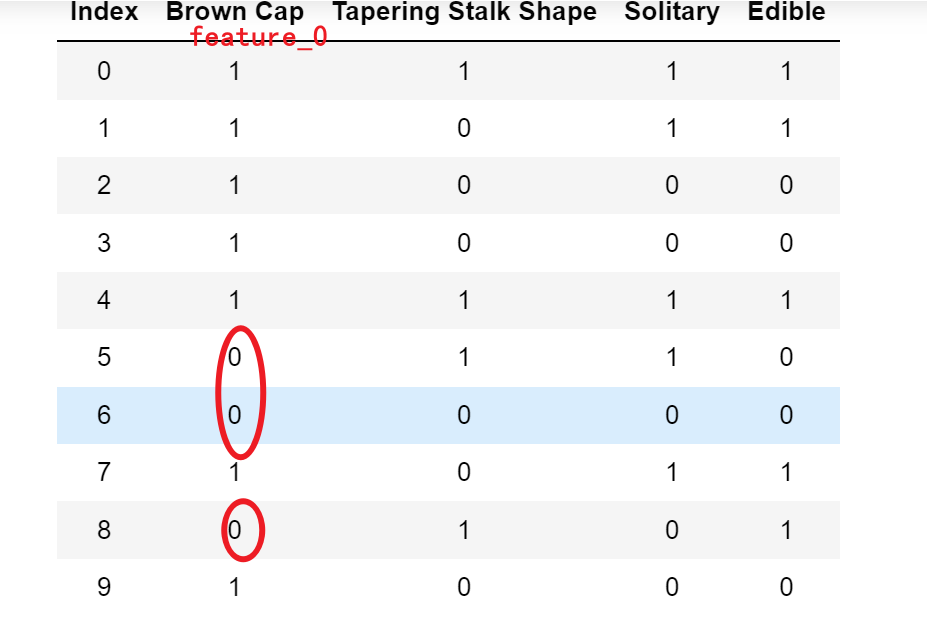

In [ ]:
def split_dataset(X, node_indices, feature):
    """
    Splits the data at the given node into
    left and right branches
    
    Args:
        X (ndarray):             Data matrix of shape(n_samples, n_features)
        node_indices (ndarray):  当前子树中待划分的所有结点
        feature (int):           指定的划分feature,根据这个feature进行划分
    
    Returns:
        left_indices (ndarray): Indices with feature value == 1
        right_indices (ndarray): Indices with feature value == 0
    
    """
    left_indices = []
    right_indeices = []
    for i in range(len(node_indices)):
        if X[i,feature] == 1:
            left_indices.append(i)
        else:
            right_indeices.append(i)
    
    return left_indices, right_indeices

In [ ]:
root_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# 选出的feature是第1个
feature = 0

left_indices, right_indices = split_dataset(X_train, root_indices, feature)

print("Left indices: ", left_indices)
print("Right indices: ", right_indices)

## Calculate information gain

$$\text{Information Gain} = H(p_1^\text{node})- (w^{\text{left}}H(p_1^\text{left}) + w^{\text{right}}H(p_1^\text{right}))$$

where 
- $H(p_1^\text{node})$ is entropy at the node 
- $H(p_1^\text{left})$ and $H(p_1^\text{right})$ are the entropies at the left and the right branches resulting from the split
- $w^{\text{left}}$ and $w^{\text{right}}$ are the proportion of examples at the left and right branch respectively

In [ ]:
root_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
# 根据indices提取出对应的样本
X_train[root_indices]


In [ ]:
def compute_information_gain(X, y, node_indices, feature):
    """
    Compute the information of splitting the node on a given feature
    Args:
        X (ndarray):            Data matrix of shape(n_samples, n_features)
        y (array like):         list or ndarray with n_samples containing the target variable
        node_indices (ndarray): 当前子树中待划分的所有结点
   
    Returns:
        cost (float):        Cost computed
    
    """
    # Split dataset
    left_indices, right_indices = split_dataset(X, y, feature)
    
    information_gain = 0
    # 计算左右分支所占的权重
    w_left, w_right = len(left_indices)/len(X), len(right_indices)/len(X)
    # 根据indices提取出对应的样本
    X_node, y_node = X[node_indices], y[node_indices]
    X_left, y_left = X[left_indices], y[left_indices]
    X_right, y_right = X[right_indices], y[right_indices]
    # compute entropy
    entropy_p1_node = compute_entropy(y_node)
    entropy_p1_left = compute_entropy(y_left)
    entropy_p1_right = compute_entropy(y_right)
    # compute information gain
    information_gain = entropy_p1_node - (w_left * entropy_p1_left + w_right * entropy_p1_right)
    return information_gain

根节点开始

In [ ]:
# 分别计算各个特征对应的information gain
info_gain0 = compute_information_gain(X_train, y_train, root_indices, feature=0)
info_gain1 = compute_information_gain(X_train, y_train, root_indices, feature=1)
info_gain2 = compute_information_gain(X_train, y_train, root_indices, feature=2)

In [ ]:
print("Information Gain from splitting the root on brown cap: ", info_gain0)
print("Information Gain from splitting the root on tapering stalk shape: ", info_gain1)
print("Information Gain from splitting the root on solitary: ", info_gain2)

## Get best split—特征选择

In [ ]:
def get_best_split(X, y, node_indices):
    """
    Returns the optimal feature and threshold value
    to split the node data 
    
    Args:
        X (ndarray):            Data matrix of shape(n_samples, n_features)
        y (array like):         list or ndarray with n_samples containing the target variable
        node_indices (ndarray): List containing the active indices. I.e, the samples being considered in this step.

    Returns:
        best_feature (int):     The index of the best feature to split
    
    """
    num_features = X.shape[1]
    best_feature = -1
    max_info_gain = 0
    for i in range(num_features):
        # 依次计算各个特征对应的information gain，选择最佳特征（maximum information gain）
        cur_info_gain = compute_information_gain(X, y, node_indices, i)
        best_feature = i if cur_info_gain >= max_info_gain else best_feature
    return best_feature

In [ ]:
best_feature = get_best_split(X_train, y_train, root_indices)
print("Best feature to split on: %d" % best_feature)

## Building the tree

In [ ]:
tree = []
def build_tree_recursive(X, y, node_indices, branch_name, max_depth, current_depth):
    """
    Build a tree using the recursive algorithm that split the dataset into 2 subgroups at each node.
    This function just prints the tree.
    
    Args:
        X (ndarray):            Data matrix of shape(n_samples, n_features)
        y (array like):         list or ndarray with n_samples containing the target variable
        node_indices (ndarray): List containing the active indices. I.e, the samples being considered in this step.
        branch_name (string):   Name of the branch. ['Root', 'Left', 'Right']
        max_depth (int):        Max depth of the resulting tree. 
        current_depth (int):    Current depth. Parameter used during recursive call.
    
    """
    # Maximum depth reached - stop splitting
    if current_depth == max_depth:
        formatting = " " * current_depth + "-" * current_depth
        print(formatting, "%s leaf node with indices" % branch_name, node_indices)
        return 
    # keep split
    best_feature = get_best_split(X, y, node_indices)
    tree.append((current_depth, branch_name, best_feature, node_indices))
    formatting = "-" * current_depth
    print("%s Depth %d, %s: Split on feature: %d" %(formatting, current_depth,branch_name, best_feature ) )
    # 基于上述选取的best feature进行split
    left_indices, right_indices = split_dataset(X, node_indices, best_feature)
    # 递归的划分左右子树
    build_tree_recursive(X, y, left_indices, "Left", max_depth, current_depth+1)
    build_tree_recursive(X, y, right_indices, "Right", max_depth, current_depth+1)

In [ ]:
build_tree_recursive(X_train, y_train, root_indices, "Root", max_depth=2, current_depth=0)

# CART

In [ ]:

def feature_split(X, feature_i, threshold):
    
    """
    定义二叉特征分裂函数
    feature_i:给定的划分特征
    X:待划分集合
    threshold：二分的正反例划分阈值
    
    """
    split_func = None
    if isinstance(threshold, int) or isinstance(threshold, float):
        split_func = lambda sample: sample[feature_i] >= threshold
    else:
        split_func = lambda sample: sample[feature_i] == threshold
    # 大于阈值的放在左边
    X_left = np.array([sample for sample in X if split_func(sample)])
    # 否则放在右边
    X_right = np.array([sample for sample in X if not split_func(sample)])
    
    return np.array([X_left, X_right])

In [ ]:
class TreeNode():
    """
    定义决策树中的单个树结点：
    本子树的左右分支、本子树是依据哪个特征划分的左右分支、由于特征有多个可能取值，本子树依据特征的哪个阈值
    """
    def __init__(self, feature_i=None, threshold=None, leaf_value=None, left_branch=None, right_branch=None):
        # 特征索引
        self.feature_i = feature_i
        # 特征划分阈值
        self.threshold = threshold
        # 叶子节点取值
        self.leaf_value = leaf_value
        # 左子树
        self.left_branch = left_branch
        # 右子树
        self.right_branch = right_branch
    

In [ ]:
class BinaryDecisionTree(object):
    """定义二叉决策树"""
    def __init__(self, min_sample_split=2, min_gini_impurity=999, max_depth=float("inf"), loss=None):
        # 根结点
        self.root = None
        # 节点最小分裂样本数，再小就不能继续划分
        self.min_sample_split = min_sample_split
        # 基于最佳特征计算得到的当前最小gini_impurity < min_gini_impurity才能进行划分
        self.min_gini_impurity = min_gini_impurity
        # 树最大深度
        self.max_depth = max_depth
        # 基尼不纯度计算函数
        self.gini_impurity_calculation = None
        # 叶子节点值预测函数:预测叶子所属分类<多数原则>/回归值
        self._leaf_value_calculation = None
        # 损失函数
        self.loss = loss
        
    def _build_tree(self, X, y, current_depth=0):
        """决策树构建函数"""
        # 初始化最小基尼不纯度==预定的min_gini_impurity
        init_gini_impurity = 999
        # 初始化最佳特征索引和阈值,之后存储最佳的特征和对应的阈值
        best_criteria = None
        # 初始化数据子集，之后存储基于最佳特征和阈值划分的左右子集(X：y)
        best_sets = None
        # 合并输入和标签
        example = np.concatenate((X,y), axis=1)
        # 获取样本数和特征数
        n_samples, n_features = X.shape
        
        # 设定决策树构建条件
        # 1、训练样本数量＞节点最小分裂样本数＆当前树深度＜最大深度
        if n_samples >= self.min_sample_split and self.current_depth <= self.max_depth:
            # 遍历计算每个特征的基尼不纯度
            for feature_i in range(n_features):
                # 获取第i特征的所有取值—取出第i列，但是维度是(m,),为方便计算，处理成(m,1)
                feature_values = np.expand_dims(X[:, feature_i], axis=1)                
                # 获取第i个特征的唯一所有可能取值
                unique_values = np.unique(feature_values)
                # 根据特征的不同取值进行划分
                for threshold in unique_values:
                    # 根据阈值划分左右分支并返回
                    left_indices, right_indices = feature_split(example, feature_i, threshold)
                    # 如果分裂后的子集大小都不为0
                    if len(left_indices) > 0 and len(right_indices) > 0:
                        # 获取两个子集的标签值
                        left_y = example[:,n_features:]
                        right_y = example[:, n_features]
                        # 计算基尼不纯度
                        gini_impurity = self.gini_impurity_calculation(y, left_y,right_y)
                        # 获取最小基尼不纯度
                        if gini_impurity < init_gini_impurity:
                            init_gini_impurity = gini_impurity
                            # 基于所选的最小gini_impurity进行将划分方案存储在best_criteria和bast_sets中
                            # 注意此时还没有真正划分
                            best_criteria = {"feature_i":feature_i, "threshold":threshold}
                            best_sets = {
                                "leftX":left_indices[:, :n_features],
                                "lefty":left_indices[:, n_features:],
                                "rightX":right_indices[:, :n_features],
                                "righty":right_indices[:, n_features:]
                            }
        # 2、当前的最小gini_impurity < 预设的mini_gini_impurity,可以进行划分
        if init_gini_impurity < self.min_gini_impurity:
            # 继续递归的进行左右子树的划分
            left_branch = self._build_tree(best_sets["leftX"], best_sets["lefty"], current_depth + 1)
            right_branch = self._build_tree(best_sets["rightX"], best_sets["righty"], current_depth + 1)
            # 左右子树划分完毕后，本子树划分完毕，返回子树
            return TreeNode(feature_i=best_criteria["feature_i"], threshold=best_criteria["threshold"], left_branch=left_branch, right_branch=right_branch)
        
        # 3、否则是叶子，直接计算
        leaf_value = self._leaf_value_calculation(y)
        return TreeNode(leaf_value=leaf_value)
                        
                    
    def fit(self, X, y, loss=None):
        """决策树拟合函数"""
        self.root = self._build_tree(X, y)
        self.loss = None
    def predict(self, X):
        """数据集预测函数"""
        y_pred = [self.predict_value(sample) for sample in X]
        return y_pred
    
    def predict_value(self, x, tree=None):
        """单个样本的预测"""
        if tree is None:# 样本刚刚进入决策树时：从root开始判断
            tree = self.root
        
        # 样本x继续走到叶子节点则已经分类（回归预测）完毕了
        if tree.leaf_value is not None:
            return tree.leaf_value
        # 此子树的最佳特征feature_i(由之前构建子树时存储的)
        feature_value = x[tree.feature_i] # 根据当前所在子树的最佳特征feature_i取出样本对应的这个特征
        branch = tree.right_branch
        # feature_value有效时（feature_i初始为None时无效）
        if isinstance(feature_value, int) or isinstance(feature_value, float):
            # 如果样本的feature_value＞=阈值就往左边走，继续递归的往下直到走到叶子节点完成预测
            if feature_value >= tree.threshold:
                branch = tree.left_branch
        elif feature_value == tree.threshold:
            branch = tree.left_branch
            
        return self.predict_value(x, branch)# 递归的继续往下判断
        
        

In [ ]:
def calculate_gini(y):
    """
    未划分时计算本节点的基尼系数:
    给定样本集合D,其gini指数为Σp_k(1-p_k),k是分类数:0,1,...,k
    y:ndarray
    
    """
    k = np.unique(y)
    p_k = [y.tolist().count(i) for i in k]
    gini = sum(p * (1-p) for p in p_k)
    return gini  

In [ ]:
class ClassificationTree(BinaryDecisionTree):
    
    def _calculate_gini_impurity(self, y, left_y, right_y):
        """
        定义gini_impurity:基于此节点已经划分的左右分支
        
        """
        # 计算正例的比例
        p = len(left_y) / len(y)
        gini = calculate_gini(y)
        gini_impurity = p * calculate_gini(left_y) + (1-p) * calculate_gini(right_y)
        return gini_impurity
    
    def _majority_vote(self, y):
        """使用多数原则对此节点的所有样本划定所属分类"""
        most_common = None
        max_count = 0
        for label in np.unique(y):
            count = len(y[y == label])
            if count > max_count:
                most_common = label
                max_count = count
        return most_common
    def fit(self, X, y):
        """分类树拟合"""
        self.impurity_calculation = self._calculate_gini_impurity
        self._leaf_value_calculation = self._majority_vote
        super(ClassificationTree, self).fit(X,y)
    

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
# 加载数据集
data = datasets.load_iris()
X,y = data.data, data.target
# y.shape是（150，），改为一维方便之后计算
y = y.reshape(-1,1)

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# 创建决策树类对象
clf = ClassificationTree()
# 训练决策树
clf.fit(X_train, y_train)
# 预测
y_pred = clf.predict(X_test)
# 查看预测准确率
print(accuracy_score(y_test, y_pred))

In [ ]:
y.shape

In [ ]:
x = np.arange(6).reshape(2,3)
print(x)
print(x[:,1]) # 取第1列
print(x[:,1].shape) # 取到的是一维的(2,)
np.expand_dims(x[:, 1], axis=1).shape # 变长（2，1）

## CART

### 计算基尼指数

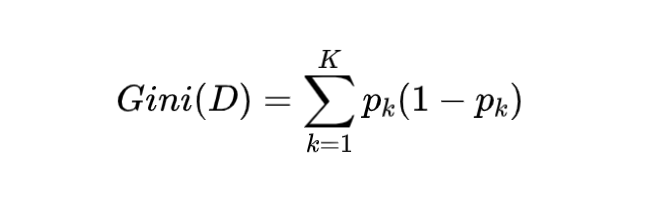

In [ ]:
def  gini(y, weight=None):
    
    """
    计算当前样本集合y的基尼指数
    :param y:一维ndarray数组
    :param weight:一维ndarray数组，样本权重
    :return:基尼系数
    
    """
    if weight is None:
        # 根节点的权重为1
        weight = np.array([1.0]*len(y))
    # 样本数
    weight_sum = np.sum(weight)
    # 统计各个pk
    probs = np.array(np.sum(weight[y==i]/weight_sum) for i in np.unique(y))
    # 基于公式计算基尼指数
    gini = np.sum([probs_k * (1-probs_k) for probs_k in probs])
    return gini

In [ ]:
y = np.array([1,3,4,4])
weight = np.array([1,1,1,1])
y == 4
weight[y==4]

### 计算条件基尼指数

属性a不同取值上基尼系数的加权求和
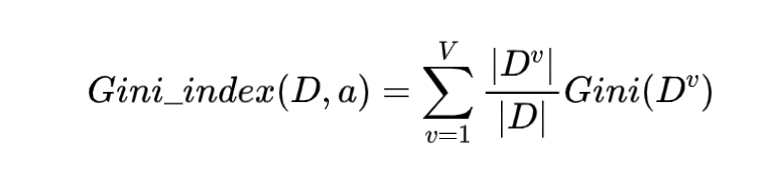

In [ ]:
def con_gini(x, y, weight=None):
    """
    计算单个特征下的条件基尼系数
    :param x:特征，一维ndarray数组
    :param y:标签，一维ndarray数组
    :param weight:样本权重，一维ndarray数组
    :return:条件基尼系数
    
    """
    if weight is None:
        weight = np.array([1.0]*len(y))
    weight_sum = np.sum(weight)
    condition_gain = 0
    for i in np.unique(x):
        # 找出特征值为i的样本索引
        index = np.where(x==i)
        # 找到索引对应的权重和标签
        y_new = y[index]
        weight_new = weight[index]
        # 计算基于此特征值进行分类时的各个分类内样本geggini_index(cond_gini_index)
        cond_gini_index += np.sum(weight_new)/weight_sum * gini(y_new, weight_new)

In [ ]:
a = np.array([1,2,3,3])
np.where(a == 3)

基尼系数增益:

cart分类树选择基尼系数变化最大（基尼系数增益）的特征来进行划分
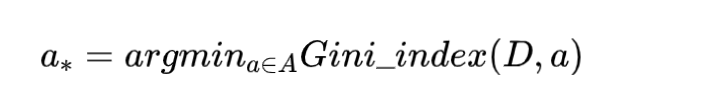


In [ ]:
def gini_gain(x,y,weight=None):
    
    """
    计算单个特征对应的基尼增益
    :param x: 特征，一维ndarray数组
    :param y: 标签，一维ndarray数组
    :param weight: 样本权重，一维ndarray数组
    :return: 基尼系数变化量
    
    """
    if weight is None:
        weight = np.array([1.0]*weight)
    return gini(y, weight) - con_gini(x, y, weight)

### 决策树构建

cart分类树中，决策树生成就是递归调用基尼系数算法来做特征选择，递归的终止条件是两个：一个是节点包含数据属于同一个类别，此时无需划分；另一个是没有特征可以用来做特征选择或者所有特征都只有一个取值，此时无法划分。

cart树是一个二叉树，因此在进行特征选择之前，要对特征进行二分，即选择能使基尼增益最大的点作为分割点对特征进行划分

In [ ]:
class Node(object):
    def __init__(self, 
                 n_sample = None, 
                 gini = None, 
                 left_child_node = None, 
                 right_child_node = None, 
                 class_prob = None, 
                 feature_index = None, 
                 feature_best_value = None):
        """
        :param n_sample: 节点样本量
        :param gini: 节点标签的基尼系数
        :param left_child_node: 节点的左侧子节点
        :param right_child_node: 节点的右侧字节带你
        :param class_prob: 节点标签的概率分布
        :param feature_index: 节点使用的特征
        :param feature_best_value: 特征的最佳分割点
        
        """
        self.n_sample = n_sample
        self.gini = gini
        self.left_child_node = left_child_node
        self.right_child_node = right_child_node
        self.class_prob = class_prob
        self.feature_index = feature_index
        self.feature_best_value = feature_best_value

        

递归建立决策树的思路：

**初始化**

建立根节点root_node
传入数据集（X，y）＆根节点：
build_tree(X, y, self.root_node, weight)

**build_tree递归过程**

    **递归基**
    1、样本基本属于同一类
    2、没有更多特征
    
    **处理当前节点（自身）**
    1、遍历找到最佳特征和特征的最佳分割点
    2、基于最佳特征和最佳分割点分成左右子树left,right，建立左右节点left_node,right_node
    3、让buildtree()帮忙划分左右子树：
    build_tree(right_x, right_y, node.right_child_node, right_weight)
    build_tree(left_x, left_y, node.left_child_node, left_weight)





基于上述思路，先准备各模块：

1、寻找最佳特征
2、寻找最佳特征的最佳分割点

先找到所有特征的每个特征的最佳分割点作为每个特征的代表，再从中选出最佳代表即最佳特征



In [1]:
class CartClassifier(object):
    def __init__(self, criterion = "gini"):
        self.criterion = criterion
        if self.criterion == "gini":
            # 使用gini增益进行特征选择
            self.func = gini_gain
    def __split(self, x, y, weight):
        """
        对特征x进行二分，找到本特征最佳的切分点
        :param x: 特征
        :param y: 标签
        :param weight:样本权重
        :return: 二分后的特征向量和最佳分割点
        
        """
        # 取出当前特征的所有可能取值
        x_unique = np.unique(x)
        # 先取所有可能取值的中点作为候选切分点
        x_split = (x_unique[:-1] + x_unique[1:]) / 2
        # 最终只能选择一个切分点（因为是二叉树）
        best_split = None
        best_gain = 0
        for i in x_split:
            x_i = np.zeros_like(x)
            # 基于特征的切分点i分成左右子树
            # 为什么可以直接赋值0/1计算？—因为gini公式中实际上只使用了p(正例的个数)
            x_i[x>=i] = 1
            x_i[x<i] = 0
            cur_gain = gini_gain(x_i, y, weight)
            if cur_gain > best_gain:
                best_gain = cur_gain
                best_split = i
        # 找到最佳切分点后进行切分
        x_new = np.zeros_like(x)
        x_new[x>=best_split] = 1
        x_new[x<best_split] = 0
        return x_new, best_split
    
    def fit(self, X, y, weight = None):
        if weight is None: # 初始时默认根节点中样本的权重为1
            weight = np.array([1.0] * len(y))
        # 首先定义根节点
        self.root_node = Node()
        # 递归建树
        self.__build_tree(X, y, self.root_node, weight)
    
    def __build_tree(self, X, y, node:Node, weight):
        
        """
        构建决策树子树：
        :param node:当前子树的根节点(Node实例)
        :param weight:子树中的样本对应的权重
        :param X:样本
        :param y: 标签
        
        """
        # 当前节点的样本量和特征的数量
        n_sample, n_feature = X.shape
        # 记录到当前节点的属性中
        node.n_sample = n_sample
        
        # 当前节点的基尼系数
        node.gini = gini(y, weight)
        # 当前节点的概率分布(不同分类值k对应的权重)
        node.class_prob = {k : np.sum(weight[y==k]) for k in np.unique(y)}
        
        ## 构建子树的递归基
        # （1、样本基本属于同一类）如果当前节点所含样本的标签只有一种取值，无需进行划分，跳出循环
        if len(np.unique(y) == 1):
            return
        # (2、没有更多特征)如果当前节点所含样本所有特征都只有一个取值，无法进行划分，跳出循环
        if np.sum(np.unique(X[:,i]) for i in range(n_feature)) == n_feature:
            return 
        
        ## 递归构建子树
        # 找到最佳特征的最佳切分点，并记录对应的最佳基尼增益
        best_feature_i = None
        best_gain = 0
        best_split = None
        # 遍历寻找最佳特征和特征的最佳分割点，此处缺失值进行特殊处理
        for feature_i in range(n_feature):# X[:, feature_i]取到每个特征
            # 去除缺失值
            nonan_index = ~np.isnan(X[:, feature_i])
            # 有效样本的占比
            nonan_prob = np.sum(weight[nonan_index])/np.sum(weight)
            if len(np.unique(X[:, feature_i][nonan_index])) == 1:
                # 只有一个有效样本则结束本特征的分割
                continue
                
            ## 1、先找到所有特征的每个特征的最佳分割点作为每个特征的代表
            
            # 对特征进行二分，找到本特征的最佳切分点和对应的左右分支
            # x_split中的值为1对应左子树，值为0对应右子树
            x_split, cur_split = self.__split(X[:, feature_i][nonan_index], y[nonan_index], weight[nonan_index])
            # 计算此特征切分的gini_gain(加权-*nonprob)
            cur_gain = self.func(x_split, y[nonan_index], weight[nonan_index]) * nonan_prob
            
            
            ## 2、找最佳特征：再从中选出最佳代表即最佳特征
            if cur_gain > best_gain:
                best_gain = cur_gain
                best_feature_i = feature_i
                best_split = cur_split
                
        ## 3、基于最佳特征和最佳分割点分成左右子树left,right，建立左右节点left_node,right_node
        
        
        # 基于上述遍历找到了最佳特征和最佳切分点，在当前节点的属性中记录
        node.feature_index = best_feature_i
        node.feature_best_value = best_split

        # 最佳特征
        x_best = X[:, best_feature_i]
        # < 最佳切分点的样本和缺失样本会被同时划分到左子节点
        nan_index = np.isnan(X[:, best_feature_i])
        left_index = nan_index + (x_best < best_split)
        left_x = X[left_index]
        left_y = y[left_index]
        left_weight = weight[left_index]
        # 缺失值的权重处理:加权（有效左子树节点数/有效总节点数）
        nan_left_weight = left_weight[np.isnan(left_x[:, best_feature_i])]
        nan_left_weight *= np.sum(weight[x_best < best_split]) / np.sum(weight[~nan_index])
        # 建立左节点left_node
        node.left_child_node = Node()
        # 递归建立左子树
        self.__build_tree(left_x, left_y, node.left_child_node, left_weight)

        # (缺失样本也会被划分到右侧子节点),
        # >=最佳切分点的样本和缺失样本会被同时划分到左子节点
        right_index = nan_index + (x_best >= best_split)
        right_x = X[right_index]
        right_y = y[right_index]
        right_weight = weight[right_index]
        # 缺失值的权重处理:加权（有效右子树节点数/有效总节点数）
        nan_right_weight = right_weight[np.isnan(right_x[:, best_feature_i])]
        nan_right_weight *= np.sum(weight[x_best>=best_split])/np.sum(weight[~nan_index])
        # 建立右节点right_node
        node.right_child_node = Node()
        # 递归建立右子树
        self.__build_tree(right_x, right_y, node.right_child_node, right_weight)
        
    def predict(self, X):
        """
        基于多数原则进行预测：X的每一个样本通过决策树搜索找到样本属于各个分类的概率分布，
        再根据多数原则选出概率最大的那个
        :param X:待预测对应类别的样本
        
        """
        # X的每一个样本通过决策树搜索找到样本属于各个分类的概率分布
        res = self.predict_prob(X)
        pred = []
        # 遍历每一行（每一个样本的各个分类概率分布），拿到每一行数据最大概率对应的类别(多数原则)
        for i in range(len(res)):
            # 多数原则取出概率最大的那个
            p = max(res[i], key = lambda k : res[i][k])
            pred.append(p)
        return pred
    
    def predict_prob(self, X):
        """
        将每一个样本都在决策树中进行遍历搜索，直到叶节点找到该样本属于各个类的概率
        :param X: 待预测对应类别的样本,∈（m,n）
        
        """
        n_sample = X.shape[0]
        results = []
        # 遍历每一行(每一个样本)，拿到每一个样本属于各个类的概率
        for i in range(n_sample):
            # 从根节点开始遍历整棵树直到叶节点确认类别
            res = self.__search_node(X[i], self.root_node) 
            result.append(res)
        return results
    
    def __search_node(self, x, node):
        """
        遍历决策树直到叶子节点确定分类的概率分布
        :param x: 待预测对应类别的单个样本
        
        """
        if node.left_child_node is not None or node.right_child_node is not None:
            if x[node.feature_index] >= node.feature_best_value:
                return self.__search_node(x, node.right_child_node)
            else:
                return self.__search_node(x, node.left_child_node)
            
        else:# 到叶子节点拿出叶子节点中的概率分布（不同分类对应的权重）
            result = {i: node.class_prob.get(i,0) for i in self.root_node.class_prob.keys()}
            return result
        
            

NameError: name 'Node' is not defined

In [ ]:
# 取切分点
a = np.array([1,2,3,3,3])
(a[:-1] + a[1:])/2

In [ ]:
a = np.array([0,1])
(a[:-1] + a[1:])/2

In [ ]:
a = np.array([1,1,2,3,3,4])
weight = np.array([0.1,0.1,0.2,0.4,0.1,0.1])
class_probs = {k : np.sum(weight[a==k]) for k in np.unique(a)}
class_probs

In [ ]:
a = np.array([1,1,2,3,3,4])
weight = np.array([0.1,0.1,0.2,0.4,0.1,0.1])
weight[a==1]

### cart分类树剪枝

#### 计算gini_index

求给定样本集合的gini_index
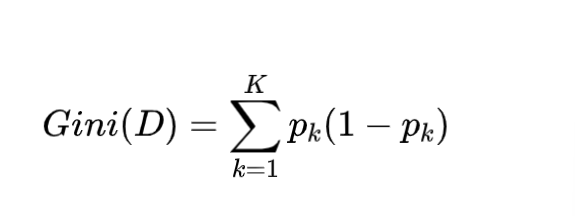

In [ ]:
def gini(y):
    """
    计算当前节点的gini_index
    :param y:当前节点的样本中对应的分类
    
    """
    p_k = np.array([np.sum([y==k])/len(y) for k in np.unique(y)])
    gini_index = np.sum([p * (1-p) for p in p_k])
    return gini_index

In [ ]:
a = np.array([1,2,2,1])
p = np.array([np.sum([a==k])/len(a) for k in np.unique(a)])
np.sum([p_i * (1 - p_i) for p_i in p])


In [ ]:
gini(a)

### 计算条件gini_index

**要考虑权重**
在给定特征A=a的条件下，样本集合D的基尼指数Gini(D,a)
-- 表示经A=a分割后集合D的不确定性。gini_index越大，不确定性越大

D_v代表通过特征A的不同取值将样本集合D切分成的不同子集
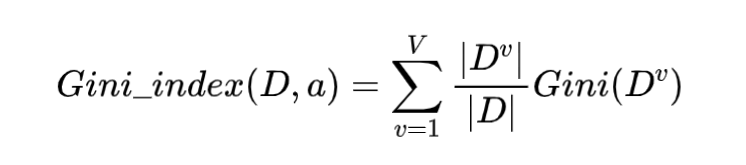

In [ ]:
def cond_gini(x_feature_i, y):
    """
    计算条件gini_index:G(D,A_i)
    计算的是以A_i=a为切分点时的二分gini，所以x_feature_i的取值只有0/1
    :param x_feature_i:给定的样本集合中每个样本对应的特征i
    :param y:待切分的样本集合
    
    """
    # 获取特征i所有可能的取值
    feature_values = np.unique(x_feature_i)
    # 计算基于所有可能的取值将样本进行二分的情况
    for value in feature_values:
        # 找出特征i取value时的样本索引
        indices = np.where(feature_values==a)
        # 基于样本索引找到对应的y
        y_new = y[indices]
        
        
    

In [ ]:
a = np.array([1,1,1,2,7,8,2])
v = np.unique(a)
np.where(a==1)

In [ ]:
x = np.array([[1,0,0,1],
              [1,0,0,2],
              [1,1,0,2],
              [1,1,1,1],
              [1,0,0,1],
              [2,0,0,1],
              [2,0,0,2],
              [2,1,1,2],
              [2,0,1,3],
              [2,0,1,3],
              [3,0,1,3],
              [3,0,1,2],
              [3,1,0,2],
              [3,1,0,3],
              [3,0,0,1]])
y = np.array([0,0,1,1,0,0,0,1,1,1,1,1,1,1,0])

当前节点：
1、寻找最佳特征
2、寻找最佳特征的最佳分割点

先找到所有特征的每个特征的最佳分割点作为每个特征的代表，再从中选出最佳代表即最佳特征

In [ ]:
def get_best_split(X,y):
    """
    找当前节点node的最佳特征及其最佳切分点
    :param X: 样本∈（m,n）
    :param y: 标签∈（m,1）
    :param node_indices 当前节点所包含的样本X对应的索引
    :return best_feature, best_split:返回最佳特征及其对应的最佳切分点
    
    """
    best_feature = -1
    best_split = None
    max_gini_gain = 0
    n_features = X.shape[1]
    # 依次遍历X的所有特征，找到所有特征的最佳切分点作为其代表
    for i in range(n_features):
        # 样本X的第i列就对应第i个特征X[:,i]
        # 用每个特征的最佳分割点计算的gini_gain作为每个特征的代表
        cur_gini_gain, cur_split = compute_gini_gain(X,y,i)
        # 选择gini_gian最大（gini_index最小）的作为最佳特征
        best_feature,best_split = i,cur_split if cur_gini_gain >= max_gini_gain
    return best_feature, best_split

对于当前节点集合（X，y）计算特征i的基尼增益:

确定特征i的所有可能取值，根据特征i是连续型/离散型特征对这些可能取值进行处理从而得到特征i的所有候选分割点；

尝试依次使用候选分割点对当前集合（X，y）进行二分分割，并计算对应的gini_gain
找到具有最大的gini_gain的分割点作为特征i的最佳分割点，用最佳分割点的gini_index作为特征i的gini_gain

由于二分分割时需要x来分成left和right，计算gini需要left_y和right_y,所有分割时直接返回indices表明分割的部分或者先将X,y合并再参与分割
所以计算特征i的基尼增益需要用到的参数
    
    :param X: 样本∈（m,n）——在对集合进行二分分割时需要使用特征值
    :param y: 标签∈（m,1）——计算gini_gain时需要
    :param feature_i: 当前计算的第i个特征，X[:,i]即对应的特征值
    :return 当前特征的最佳切分点及其对应的gini_gain
    
**离散型/连续型所取的候选分割点和分割时使用的方法均不同**

In [ ]:
# 对于当前节点集合（X，y）-node_indices计算特征i的基尼增益
"""
:param sample:当前集合的X和y
:param feature_i: 当前计算的第i个特征，X[:,i]即对应的特征值
:return 当前特征的最佳切分点及其对应的gini_gain

"""

# 1、确定特征i的所有可能取值
feature_values = np.unique(sample[:, feature_i]).reshape(-1,1)# 已排序的
best_gini_gain = None
best_split_point = None
# 根据特征i是连续型/离散型特征对这些可能取值进行处理从而得到特征i的所有候选分割点；    
if np.issubdtype(feature_values.dtype, np.integer) or np.issubdtype(feature_values[0], np.floating):
    # 特征是连续型特征则使用二分法找到所有的切分点
    split_points = (feature_values[1:] + feature_values[:-1]) / 2
    # 依次使用候选分割点对当前集合（X，y）进行二分分割
    for point in split_points:
        # 基于分割点会将当前集合（X，y）划分成左右分支，记录对应的索引方便之后取特征和y
        left_sample = []
        right_sample = []
        for single_sample in sample:# 处理每个样本
            if single_sample[feature_i] <= point:# 小于切分点的放在左边
                left_sample.append(single_sample)
            else:
                right_sample.append(single_sample)  
else:# 离散型特征直接使用特征的各个取值作为切分点
    split_points = feature_values
    # 依次使用候选分割点对当前集合（X，y）进行二分分割
    for point in split_points:
        left_sample = []
        right_sample = []
        for single_sample in sample:# 处理每个样本
            # 基于分割点会将当前集合（X，y）划分成左右分支
            if single_sample[feature_i] == point:
                left_sample.append(single_sample)
            else:
                right_sample.append(single_sample)
        # 分好左右分支后计算gini_gain
        w_left = len(left_X) / len(X)
        w_right = len(right_X) / len(X)
        left_y = y[left_indices]
        right_y = y[right_indices]
        cur_gini_index = w_left * gini(left_y) + w_right * gini(right_y)
        cur_gini_gain = gini(y) - cur_gini_index

# 找到具有最大的gini_gain的分割点作为特征i的最佳分割点
best_gini_gain, best_split_point = (cur_gini_gain,point )if cur_gini_gain >= best_gini_gain else best_gini_gain            
    

将上述代码模块化

使用sample的版本

In [ ]:
# 离散型/连续型所取的候选分割点和分割时使用的方法均不同
# 故可以先定义二叉分割函数
def feature_split(sample,feature_i, split_point, split_func):
    
    """
    给定分割点split_point,根据特征是离散型/连续型对当前集合X进行二分分割
    :param sample: 当前待分割集合
    :param feature_i : 当前考虑的特征的索引
    :param split_point:给定的一个候选分割点

    """ 
    ## 对当前集合X进行二分分割
    left_sample = np.array([single_sample for single_sample in sample if split_func(single_sample, split_point)])
    right_sample = np.array([single_sample for single_sample in sample if not split_func(single_sample, split_point)])
    return left_sample, right_sample

In [ ]:
def create_split_points(X, feature_i):
    
    """
    根据特征i是连续型/离散型特征得到特征i的所有候选分割点,并返回对应的分割函数
    :param X: 当前集合的样本
    :param feature_i : 给定的特征索引
    :return 特征i的所有候选分割点、分割函数
    
    """
    
    # 1、确定特征i的所有可能取值
    feature_values = np.unique(X[:, feature_i]).reshape(-1,1)# 已排序的 
    
    # 2、根据特征i是连续型/离散型特征对这些可能取值进行处理从而得到特征i的所有候选分割点；    
    split_points = None
    split_func = None
   
    if np.issubdtype(feature_values.dtype, np.integer) or np.issubdtype(feature_values.dtype, np.floating):
        split_points = (feature_values[1:] + feature_values[:-1]) / 2 # 特征是连续型特征则使用二分法找到所有的切分点
        split_func = lambda (x,split_point) : x[feature_i] >= split_point
        
    else:
        split_points = feature_values# 离散型特征直接使用特征的各个取值作为切分点
        split_func = lambda (x,split_point) : x[feature_i] == split_point
    return split_points, split_func

In [ ]:
# 测试
a = np.array([['青年','否','否','一般'],
               ['青年','否','否','好'],
               ['青年','是','否','好'],
               ['青年','是','是','一般'],
               ['青年','否','否','一般'],
               ['中年','否','否','一般'],
               ['中年','否','否','好'],
               ['中年','是','是','好'],
               ['中年','否','是','非常好'],
               ['中年','否','是','非常好'],
               ['老年','否','是','非常好'],
               ['老年','否','是','好'],
               ['老年','是','否','好'],
               ['老年','是','否','非常好'],
               ['老年','否','否','一般'],])
create_split_points(a, 0)

In [ ]:
a = np.array([[1,0,0,1],
              [1,0,0,2],
              [1,1,0,2],
              [1,1,1,1],
              [1,0,0,1],
              [2,0,0,1],
              [2,0,0,2],
              [2,1,1,2],
              [2,0,1,3],
              [2,0,1,3],
              [3,0,1,3],
              [3,0,1,2],
              [3,1,0,2],
              [3,1,0,3],
              [3,0,0,1]], dtype=object)
create_split_points(a, 0)

In [ ]:
a = np.arange(24).reshape(4,6)
create_split_points(a,0)

In [16]:
def get_best_split_point(X,y,feature_i):
    # 当前特征i的所有候选分割点及分割点对应的分割函数
    split_points, split_func = create_split_points(X, feature_i)
    # 合并X，y方便之后分割——x可能由于离散数据导致合并后y的dtype改变,需要转换类型
    # ——使用indices更好
    sample = np.concatenate((X,y), axis=1)
    # 初始化
    best_gini = -1 # 存储本特征的最佳切分点对应的gini_gain
    best_sets = None  # 存储最佳切分点切分的左右分支
    # 依次使用候选分割点对当前集合（X，y）进行二分分割
    for point in split_points:
        # 使用每个候选分割点进行二分分割
        ## 对当前集合X进行二分分割
        left_sample = np.array([single_sample for single_sample in sample if split_func(single_sample, point)])
        right_sample = np.array([single_sample for single_sample in sample if not split_func(single_sample,point)])
        # 分好左右分支后计算gini_gain
        w_left,w_right = len(left_sample) / len(sample), len(right_sample)/len(sample)
        left_y = left_sample[:,-1].astype(np.float32)
        right_y = right_sample[:,-1].astype(np.float32)
        cur_gini_gain = gini(y) - (w_left * gini(left_y) + w_right * gini(right_y))
        # 选择最佳的split point
        if cur_gini_gain >= best_gini:
            best_gini_gain = cur_gini_gain
            best_sets = {
                "left_X": left_sample[:, :-1],
                "left_y": left_y,
                "right_X": right_sample[:, :-1],
                "right_y": right_y
            }
    return best_gini_gain, best_sets


In [ ]:
a = np.array([['青年','否','否','一般'],
               ['青年','否','否','好'],
               ['青年','是','否','好'],
               ['青年','是','是','一般'],
               ['青年','否','否','一般'],
               ['中年','否','否','一般'],
               ['中年','否','否','好'],
               ['中年','是','是','好'],
               ['中年','否','是','非常好'],
               ['中年','否','是','非常好'],
               ['老年','否','是','非常好'],
               ['老年','否','是','好'],
               ['老年','是','否','好'],
               ['老年','是','否','非常好'],
               ['老年','否','否','一般'],], dtype=object)
b = np.array([0,0,1,1,0,0,0,1,1,1,1,1,1,1,0]).reshape(-1,1)
get_best_split_point(a, b,3)

In [2]:
# 测试
a = np.array([[1,0,0,1],
              [1,0,0,2],
              [1,1,0,2],
              [1,1,1,1],
              [1,0,0,1],
              [2,0,0,1],
              [2,0,0,2],
              [2,1,1,2],
              [2,0,1,3],
              [2,0,1,3],
              [3,0,1,3],
              [3,0,1,2],
              [3,1,0,2],
              [3,1,0,3],
              [3,0,0,1]], dtype=object)
b = np.array([0,0,1,1,0,0,0,1,1,1,1,1,1,1,0]).reshape(-1,1)
get_best_split_point(a, b,0)

NameError: name 'np' is not defined

上述代码运行不对，使用node_indices的版本

In [ ]:
def create_split_points(X, feature_i):
    
    """
    根据特征i是连续型/离散型特征得到特征i的所有候选分割点,并返回对应的分割函数
    :param X: 当前集合的样本
    :param feature_i : 给定的特征索引
    :return 特征i的所有候选分割点、分割函数
    
    """
    
    # 1、确定特征i的所有可能取值
    feature_values = np.unique(X[:, feature_i])# 已排序的 
    
    # 2、根据特征i是连续型/离散型特征对这些可能取值进行处理从而得到特征i的所有候选分割点；    
    split_points = None
    split_func = None
   
    if np.issubdtype(feature_values.dtype, np.integer) or np.issubdtype(feature_values.dtype, np.floating):
        split_points = (feature_values[1:] + feature_values[:-1]) / 2 # 特征是连续型特征则使用二分法找到所有的切分点
        split_func = lambda x,split_point : x[feature_i] >= split_point
        
    else:
        split_points = feature_values# 离散型特征直接使用特征的各个取值作为切分点
        split_func = lambda x,split_point : x[feature_i] == split_point
    return split_points, split_func

In [ ]:
a = np.array([1,2,3])
a = np.unique(a).reshape(-1,1)
for e in a:
    print(e == 1)
    print(type(e))

In [ ]:
def get_best_split_point(X,y,node_indices, feature_i):
    
    """
    对于当前节点集合（X，y）-node_indices计算特征i的基尼增益
    :param X: 所有样本
    :param y: 所有标签
    :param node_indices : 当前样本集合对应的索引
    :param : 给定的特征索引
    :return : 返回特征i的基尼增益以及分割的左右子树
    
    """
    # 当前特征i的所有候选分割点
    split_points, split_func = create_split_points(X[node_indices], feature_i)
    # 初始化
    best_gini_gain = -1# 存储本特征的最佳切分点对应的gini_gain
    best_sets = None# 存储最佳切分点切分的左右分支
    # 依次使用候选分割点对当前集合（X，y）进行二分分割
    for point in split_points:
        # 使用每个候选分割点进行二分分割
        left_indices = np.array([i for i in node_indices if split_func(X[i],point)])
        right_indices = np.array([ i for i in node_indices if not split_func(X[i],point)])
        # 分好左右分支后计算gini_gain
        w_left, w_right = len(left_indices) / len(node_indices), len(right_indices) / len(node_indices)
        cur_gini_gain = gini(y[node_indices]) - (w_left * gini(y[left_indices]) + w_right * gini(y[right_indices]))
        # 选择最佳的split point
        if cur_gini_gain >= best_gini_gain:
            best_gini_gain = cur_gini_gain
            best_sets = {
                "best_split_point":point,
                "left_indices": left_indices,
                "right_indices": right_indices,
            }
    return best_gini_gain, best_sets

In [ ]:
def gini(y):
    """
    计算当前节点的gini_index
    :param y:当前节点的样本中对应的分类
    
    """
    p_k = np.array([np.sum([y==k])/len(y) for k in np.unique(y)])
    gini_index = np.sum([p * (1-p) for p in p_k])
    return gini_index
    

In [ ]:
b = np.array([0,0,1,1,0,0,0,1,1,1,1,1,1,1,0]).reshape(-1,1)
gini(b)

In [ ]:
# 测试
a = np.array([['青年','否','否','一般'],
               ['青年','否','否','好'],
               ['青年','是','否','好'],
               ['青年','是','是','一般'],
               ['青年','否','否','一般'],
               ['中年','否','否','一般'],
               ['中年','否','否','好'],
               ['中年','是','是','好'],
               ['中年','否','是','非常好'],
               ['中年','否','是','非常好'],
               ['老年','否','是','非常好'],
               ['老年','否','是','好'],
               ['老年','是','否','好'],
               ['老年','是','否','非常好'],
               ['老年','否','否','一般'],])
b = np.array([0,0,1,1,0,0,0,1,1,1,1,1,1,1,0]).reshape(-1,1)
node_indices = np.arange(15)
get_best_split_point(a,b,node_indices,0)


有了上述寻找最佳切分点的模块后，就可以针对求所有特征的gini_gain了

In [11]:
def get_best_split_feature(X,y,node_indices):
    """
    对于当前节点集合（X，y）-node_indices,找到最佳特征：求所有特征的gini_gain
    :param X: 所有样本
    :param y: 所有标签
    :param node_indices : 当前样本集合对应的索引
    
    """
    
    # 获取样本数和特征数
    n_samples, n_features = len(node_indices), X.shape[1]
 
    best_gini_gain = -1
    best_feature = None
    best_sets = None
    # 依次求所有特征的gini_gain
    for feature_i in range(n_features):
        # 特征在所有样本中取值唯一时无需找split_point和参与特征划分
        if len(np.unique(X[node_indices][:,feature_i])) == 1:
            continue
        # 特征i的基尼增益以及分割的左右子树
        cur_gini_gain,cur_branch_sets = get_best_split_point(X,y,node_indices, feature_i)
        # 寻找最佳特征
        if cur_gini_gain >= best_gini_gain:
            best_gini_gain = cur_gini_gain
            best_feature = feature_i
            best_sets = cur_branch_sets
            
    # 找到了当前节点所用的最佳特征（也找到了该特征的最佳分割点）

    return best_feature, best_sets  

In [17]:
# test
# 测试
a = np.array([[1,0,0,1],
              [1,0,0,2],
              [1,1,0,2],
              [1,1,1,1],
              [1,0,0,1],
              [2,0,0,1],
              [2,0,0,2],
              [2,1,1,2],
              [2,0,1,3],
              [2,0,1,3],
              [3,0,1,3],
              [3,0,1,2],
              [3,1,0,2],
              [3,1,0,3],
              [3,0,0,1]], dtype=object)
b = np.array([0,0,1,1,0,0,0,1,1,1,1,1,1,1,0]).reshape(-1,1)
get_best_split_feature(a,b,np.arange(len(a)))

TypeError: get_best_split_point() takes 3 positional arguments but 4 were given

连续型特征的二分法

In [ ]:
# np.unique用于找出数组中的唯一值并返回已排序的结果
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
b = np.unique(ints)# 已排序
b

In [3]:
# 求各种取值的中点
midpoints = (b[:-1] + b[1:]) / 2
midpoints

NameError: name 'b' is not defined

In [ ]:
a = np.array([1,0])
np.issubdtype(a[1].dtype, np.integer)

判断连续/离散型特征

In [ ]:
a = np.array([1,1,1,2,7,8,2])
np.issubdtype(a.dtype, np.floating)

有了上述模块后，就可以进行递归建树了

递归建立决策树的思路：

**初始化**

建立根节点root_node
传入数据集（X，y）＆根节点：
build_tree(X, y, self.root_node, weight)

**build_tree递归过程**

    **递归基**
    1、样本基本属于同一类
    2、没有更多特征
    
    **处理当前节点（自身）**
    1、遍历找到最佳特征和特征的最佳分割点
    2、基于最佳特征和最佳分割点分成左右子树left,right，建立左右节点left_node,right_node
    3、让buildtree()帮忙划分左右子树：
    build_tree(right_x, right_y, node.right_child_node, right_weight)
    build_tree(left_x, left_y, node.left_child_node, left_weight)

In [12]:
def build_tree_recussive(X,y, node_indices):
    """
    对于当前节点集合（X，y）-node_indices,递归建立决策树
    :param X: 所有样本
    :param y: 所有标签
    :param node_indices : 当前样本集合对应的索引
    
    """
    n_samples = len(node_indices)
    n_features = X.shape[1]
    
    ## 递归基
    # 节点包含数据属于同一个类别，此时无需划分
    if len(np.unique(y[node_indices])) <= 1:
        return
    # 没有更多特征(当前节点所含样本所有特征都只有一个取值)
    if np.sum(len(np.unique(X[node_indices][:,i])))== n_features: 
        return
    
    ## 处理当前节点自身
    # 找到最佳特征和特征的最佳分割点
    best_feature, best_sets = get_best_split_feature(X, y, node_indices)
    # 基于最佳特征和最佳分割点分成左右子树left,right
    left_indices = best_sets["left_indices"]
    right_indices = best_sets["right_indices"]
    
    # 让buildtree()帮忙划分左右子树
    build_tree_recussive(X,y,left_indices)
    build_tree_recussive(X,y,right_indices)

上述代码是逻辑实现，要记录划分的树结构，需要添加记录机制——Node类,将这个状态记录沿着递归树传递下去

In [13]:
class Node(object):
    """通过树结点的各属性记录生成的树结构"""
    def __init__(self,
                 best_feature_i=None, 
                 best_split_point=None,
                 left_node=None, 
                 right_node=None,
                 leaf_class = None):
        """
        每个当前结点Node都记录了当前的划分状况
        :param left_child_node : 结点的左侧子结点
        :param right_child_node : 结点的右侧子结点
        :param best_feature_i : 当前结点的最佳划分特征
        :param split_point : 当前结点的最佳特征对应的最佳分割点
        :param leaf_class : 如果当前结点是叶子，则记录其所属的类别
        
        """
        self.best_feature_i = best_feature_i
        self.best_split_point = best_split_point
        self.left_node = left_node
        self.right_node = right_node
        self.leaf_class = leaf_class
        

为什么不记录left_indice和right_indices?

对于构建的决策树，训练过程的数据集划分不重要，重要的是当前结点按照哪个特征和分割点进行分割。

这样当有训练集以外的样本要预测时就可以一路遍历决策树直到到达叶子节点找到对应的分类

In [14]:
def build_tree_recussive(X,y, node_indices,node:Node):
    """
    对于当前节点集合（X，y）-node_indices,递归建立决策树
    :param X: 所有样本
    :param y: 所有标签
    :param node_indices : 当前样本集合对应的索引
    :param node : 当前结点的状态记录
    
    """
    """
    对于当前节点集合（X，y）-node_indices,递归建立决策树
    :param X: 所有样本
    :param y: 所有标签
    :param node_indices : 当前样本集合对应的索引
    
    """
    n_samples = len(node_indices)
    n_features = X.shape[1]
    
    ## 递归基
    # 节点包含数据属于同一个类别，此时无需划分
    if len(np.unique(y[node_indices])) <= 1:
        # 记录叶子结点所属的分类
        node.leaf_class = y[node_indices][0]
        return
    # 没有更多特征(当前节点所含样本所有特征都只有一个取值)
    if np.sum(len(np.unique(X[node_indices][:,i])) for i in range(n_features)) == n_features:
        return
    ## 处理当前节点自身
    # 找到最佳特征和特征的最佳分割点
    best_feature_i, best_sets = get_best_split_feature(X, y, node_indices)
    # 基于最佳特征和最佳分割点分成左右子树left,right
    left_indices = best_sets["left_indices"]
    right_indices = best_sets["right_indices"]
    # 记录本节点的状态
    node.best_feature_i = best_feature_i
    node.best_split_point = best_sets["best_split_point"]
    node.left_node = Node()
    node.right_node = Node()
    # --leaf_value在递归基时才记录
    
    # 让buildtree()帮忙划分左右子树
    build_tree_recussive(X,y,left_indices,node.left_node)
    build_tree_recussive(X,y,right_indices,node.right_node)
    
    

In [15]:
# test
# 测试
a = np.array([[1,0,0,1],
              [1,0,0,2],
              [1,1,0,2],
              [1,1,1,1],
              [1,0,0,1],
              [2,0,0,1],
              [2,0,0,2],
              [2,1,1,2],
              [2,0,1,3],
              [2,0,1,3],
              [3,0,1,3],
              [3,0,1,2],
              [3,1,0,2],
              [3,1,0,3],
              [3,0,0,1]], dtype=object)
b = np.array([0,0,1,1,0,0,0,1,1,1,1,1,1,1,0]).reshape(-1,1)
root_node = Node()
build_tree_recussive(a,b,np.arange(len(a)),root_node)

C:\Users\17761\AppData\Local\Temp\ipykernel_11940\415273674.py:27: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  if np.sum(len(np.unique(X[node_indices][:,i])) for i in range(n_features)) == n_features:


NameError: name 'get_best_split_point' is not defined

上述代码构建好了决策树，如何进行预测？——二叉搜索树

从根结点开始遍历已经构建好的决策树：

走到当前结点的x,根据当前节点的最佳特征及最佳切分点决定是继续往左边走还是往右边走：
离散型特征==时/连续型特征>=时往左边走，否则往右边

让二叉搜索树帮忙继续搜索

递归基：遍历到叶子节点则返回

通过返回的叶子节点判断所属分类

In [ ]:
def predict(X):
    """
    :param X: 待预测的m个样本
    
    """
    # 每一个样本都通过二叉搜索决策树树查找所属类别,决策树由其根节点作为代表
    y_pred = [search_class(x, root_node) for x in X]
    return y_pred

In [5]:
def search_class(x, node:Node):
    """
    : param x: 待预测所属分类的样本
    : param node : 当前所在节点
    
    """
    ## 递归基
    if node.leaf_class is not None:
        return node.leaf_class
    
    ## 当前节点的工作
    # 根据当前节点的最佳特征及最佳切分点决定x是继续往左边走还是往右边走
    # 与训练时不同，这里在预测单个样本时取的feature_value是单个值,转成array才能在后面用dtype
    feature_value = x[node.best_feature_i]
    print(feature_value)
    # 离散型/连续型特征处理不同
    
    if np.issubdtype(np.array(feature_value).dtype, np.integer) or np.issubdtype(np.array(feature_value).dtype, np.floating):
        # 连续型
        if feature_value >= node.best_split_point:
            # 往左边
            return search_class(x,node.left_node)
        else:
            return search_class(x, node.right_node)
    else:
        if feature_value == node.best_split_point:
            # 往左边
            return search_class(x, node.left_node)
        else:
            return search_class(x, node.right_node)
        

NameError: name 'Node' is not defined

上述代码出口太多了，修改一下格式（逻辑不变）

In [ ]:
def search_class(x, node:Node):
    """
    : param x: 待预测所属分类的样本
    : param node : 当前所在节点
    
    """
    
    
    # 递归基
    if node.leaf_class is not None:# 已经走到叶子
        return node.leaf_class
    ## 当前节点的工作
    # 本样本最终要往哪个分支走
    goto = None
    # 根据当前节点的最佳特征及最佳切分点决定x是继续往左边走还是往右边走
    feature_value = x[node.best_feature_i]
    # 离散型/连续型特征处理不同
    if isinstance(feature_value, int) or isinstance(feature_value, float):
        if feature_value >= node.best_split_point:
            goto = node.left_node# 往左边
        else:
            goto = node.right_node#往右边
    else:
        if feature_value == node.best_split_point:
            goto = node.left_node# 往左边
        else:
            goto = node.right_node
    return search_class(x, goto)
        

In [ ]:
a = np.array([[1,1,1,1],
              [1,0,0,2],
              [1,1,0,2],
              [1,1,1,1],
              [1,0,0,1],
              [2,0,0,1],
              [2,0,0,2],
              [2,1,1,2],
              [2,0,1,3],
              [2,0,1,3],
              [3,0,1,3],
              [3,0,1,2],
              [3,1,0,2],
              [3,1,0,3],
              [3,1,1,1]], dtype=object)
np.array(a[0][0]).dtype # 改变为int了

In [ ]:
from sklearn.datasets import load_iris
data = load_iris()
X,y = data.data, data.target
root_node = Node()
build_tree_recussive(X,y, np.arange(len(X)), root_node)


In [ ]:
predict(X)

In [ ]:
y

## cart-决策树剪枝

预剪枝＋后剪枝

预剪枝:
在构造决策树划分节点时，前面建树停止是下述两个递归基
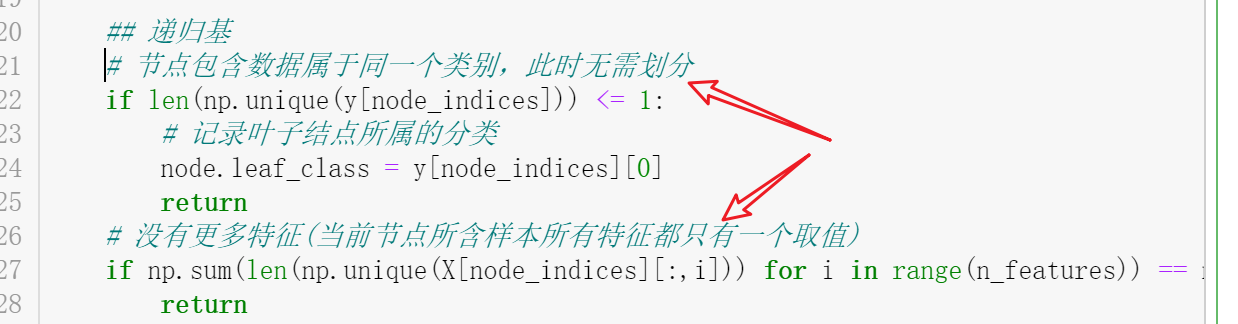
现在增加递归基对树的大小进行一定的限制：

-限制树的最大深度

-限制节点的最小样本量

-基尼系数增益的最小值（gini_gain太小时不划分）

后剪枝：
自底向上处理已经构建的决策树的非叶子结点：

对于当前处理的非叶结点：

    -让递归函数帮忙处理左右子树
    
    -已经处理后自己左右子树的结点处理自身：
        -比较剪枝前的loss与剪枝后的loss，若剪枝后loss更小则剪枝（收回左右结点）


### 预剪枝

限制树的最大深度:当前节点划分前先判断当前深度是否超过预设的最大深度，所以增加深度记录

限制节点的最小样本量同理

以下是改动部分

限制树的深度后——叶子节点所含的便签不一定只有一种了，需要根据多数原则定叶子节点所属的分类

In [12]:
def majority_vote(y):
    """
    根据多数原则定叶子节点所属的分类
    :param y: 当前叶子节点的所有标签
    :return most_common_class叶子节点所属的分类
    """
    most_common_class = None
    max_count = 0
    for label in np.unique(y):
        count = np.sum(y==label)
        if count >= max_count:
            most_common_class = label
            max_count = count
    return most_common_class
    

In [15]:
a = np.array([1,2,3,5,5])
majority_vote(a)
b = np.array(["青年","青年","老年"])
majority_vote(b)

'青年'

In [18]:
class Node(object):
    """通过树结点的各属性记录生成的树结构"""
    def __init__(self,
                 best_feature_i=None, 
                 best_split_point=None,
                 left_node=None, 
                 right_node=None,
                 leaf_class = None):
        """
        每个当前结点Node都记录了当前的划分状况
        :param left_child_node : 结点的左侧子结点
        :param right_child_node : 结点的右侧子结点
        :param best_feature_i : 当前结点的最佳划分特征
        :param split_point : 当前结点的最佳特征对应的最佳分割点
        :param leaf_class : 如果当前结点是叶子，则记录其所属的类别
        
        """
        self.best_feature_i = best_feature_i
        self.best_split_point = best_split_point
        self.left_node = left_node
        self.right_node = right_node
        self.leaf_class = leaf_class
        
class CartDecisionTree():
    """使用cart算法构建决策树"""
    
    def __init__(self, max_depth = float("inf"),min_sample_split=2, min_gini_decrease=None):
        # 代表决策树的决策树根节点
        self.root_node = None 
        # 预设的决策树最大深度
        self.max_depth = max_depth
        # 预设的决策树叶子节点最小样本数
        self.min_sample_split = min_sample_split
        # 预设的基尼系数增益的最小值（gini_gain太小时不划分）
        self.min_gini_decrease = min_gini_decrease
        
    def fit(self, X,y):
        """
        决策树拟合
        :param X : 训练数据集∈（m,n）
        :param y : 训练标签∈（n,1）
        
        """
        # 创建决策树根结点
        self.root_node = Node()
        # 默认根节点的深度为1
        cur_depth = 1
        # 递归构建决策树
        self._build_tree_recussive(X,y,np.arange(len(X)),self.root_node, cur_depth)
        
    def _build_tree_recussive(self, X,y, node_indices,node:Node, cur_depth):
        """
        对于当前节点集合（X，y）-node_indices,递归建立决策树
        :param X: 所有样本
        :param y: 所有标签
        :param node_indices : 当前样本集合对应的索引
        :param node : 当前结点的状态记录

        """
        """
        对于当前节点集合（X，y）-node_indices,递归建立决策树
        :param X: 所有样本
        :param y: 所有标签
        :param node_indices : 当前样本集合对应的索引

        """
        n_samples = len(node_indices)
        n_features = X.shape[1]

        ## 递归基
        # 节点包含数据属于同一个类别，此时无需划分
        if len(np.unique(y[node_indices])) <= 1:
            # 记录叶子结点所属的分类
            node.leaf_class = y[node_indices][0]
            return
        # 没有更多特征(当前节点所含样本所有特征都只有一个取值)
        if np.sum([len(np.unique(X[node_indices][:,i])) for i in range(n_features)]) == n_features:
            node.leaf_class = self._majority_vote(y[node_indices])
            return
        # 限制构建子树的深度
        if cur_depth >= self.max_depth:
            node.leaf_class = self._majority_vote(y[node_indices])
            return
        # 限制节点的最小样本量
        if n_samples < self.min_sample_split:
            node.leaf_class = self._majority_vote(y[node_indices])
            return

        ## 处理当前节点自身
        # 找到最佳特征和特征的最佳分割点
        best_feature_i,best_gini_gain, best_sets = self._get_best_split_feature(X, y, node_indices)
        
        # 基尼系数增益的最小值（gini_gain太小时不划分）
        if self.min_gini_decrease is not None and  best_gini_gain < self.min_gini_decrease:
            node.leaf_class = self._majority_vote(y[node_indices])
            return
        
        # 基于最佳特征和最佳分割点分成左右子树left,right
        left_indices = best_sets["left_indices"]
        right_indices = best_sets["right_indices"]
        # 记录本节点的状态
        node.best_feature_i = best_feature_i
        node.best_split_point = best_sets["best_split_point"]
        node.left_node = Node()
        node.right_node = Node()
        # --leaf_class在递归基时才记录

        # 让buildtree()帮忙划分左右子树
        self._build_tree_recussive(X,y,left_indices,node.left_node, cur_depth+1)
        self._build_tree_recussive(X,y,right_indices,node.right_node, cur_depth+1)
    
    
    def _get_best_split_feature(self,X,y,node_indices):
        """
        对于当前节点集合（X，y）-node_indices,找到最佳特征：求所有特征的gini_gain
        :param X: 所有样本
        :param y: 所有标签
        :param node_indices : 当前样本集合对应的索引

        """

        # 获取样本数和特征数
        n_samples, n_features = len(node_indices), X.shape[1]

        best_gini_gain = -1
        best_feature = None
        best_sets = None
        # 依次求所有特征的gini_gain
        for feature_i in range(n_features):
            # 特征在所有样本中取值唯一时无需找split_point和参与特征划分
            if len(np.unique(X[node_indices][:,feature_i])) == 1:
                continue
            # 特征i的基尼增益以及分割的左右子树
            cur_gini_gain,cur_branch_sets = self._get_best_split_point(X,y,node_indices, feature_i)
            # 寻找最佳特征
            if cur_gini_gain >= best_gini_gain:
                best_gini_gain = cur_gini_gain
                best_feature = feature_i
                best_sets = cur_branch_sets

        # 找到了当前节点所用的最佳特征（也找到了该特征的最佳分割点）

        return best_feature,best_gini_gain, best_sets
    
    def _get_best_split_point(self,X,y,node_indices, feature_i):
    
        """
        对于当前节点集合（X，y）-node_indices计算特征i的基尼增益
        :param X: 所有样本
        :param y: 所有标签
        :param node_indices : 当前样本集合对应的索引
        :param : 给定的特征索引
        :return : 返回特征i的基尼增益以及分割的左右子树

        """
        # 当前特征i的所有候选分割点
        split_points, split_func = self._create_split_points(X[node_indices], feature_i)
        # 初始化
        best_gini_gain = -1# 存储本特征的最佳切分点对应的gini_gain
        best_sets = None# 存储最佳切分点切分的左右分支
        # 依次使用候选分割点对当前集合（X，y）进行二分分割
        for point in split_points:
            # 使用每个候选分割点进行二分分割
            left_indices = np.array([i for i in node_indices if split_func(X[i],point)])
            right_indices = np.array([ i for i in node_indices if not split_func(X[i],point)])
            # 分好左右分支后计算gini_gain
            w_left, w_right = len(left_indices) / len(node_indices), len(right_indices) / len(node_indices)
            cur_gini_gain = self._gini(y[node_indices]) - (w_left * self._gini(y[left_indices]) + w_right * self._gini(y[right_indices]))
            # 选择最佳的split point
            if cur_gini_gain >= best_gini_gain:
                best_gini_gain = cur_gini_gain
                best_sets = {
                    "best_split_point":point,
                    "left_indices": left_indices,
                    "right_indices": right_indices,
                }
        return best_gini_gain, best_sets
    
    def _create_split_points(self,X, feature_i):
    
        """
        根据特征i是连续型/离散型特征得到特征i的所有候选分割点,并返回对应的分割函数
        :param X: 当前集合的样本
        :param feature_i : 给定的特征索引
        :return 特征i的所有候选分割点、分割函数

        """

        # 1、确定特征i的所有可能取值
        feature_values = np.unique(X[:, feature_i])# 已排序的 

        # 2、根据特征i是连续型/离散型特征对这些可能取值进行处理从而得到特征i的所有候选分割点；    
        split_points = None
        split_func = None

        if np.issubdtype(feature_values.dtype, np.integer) or np.issubdtype(feature_values.dtype, np.floating):
            split_points = (feature_values[1:] + feature_values[:-1]) / 2 # 特征是连续型特征则使用二分法找到所有的切分点
            split_func = lambda x,split_point : x[feature_i] >= split_point

        else:
            split_points = feature_values# 离散型特征直接使用特征的各个取值作为切分点
            split_func = lambda x,split_point : x[feature_i] == split_point
        return split_points, split_func
    
    def _gini(self,y):
        """
        计算当前节点的gini_index
        :param y:当前节点的样本中对应的分类

        """
        p_k = np.array([np.sum([y==k])/len(y) for k in np.unique(y)])
        gini_index = np.sum([p * (1-p) for p in p_k])
        return gini_index
    
    def _majority_vote(self, y):
        """
        根据多数原则定叶子节点所属的分类
        :param y: 当前叶子节点的所有标签
        :return most_common_class叶子节点所属的分类
        """
        most_common_class = None
        max_count = 0
        for label in np.unique(y):
            count = np.sum(y==label)
            if count >= max_count:
                most_common_class = label
                max_count = count
        return most_common_class
    
    def predict(self,X):
        """
        :param X: 待预测的m个样本

        """
        # 每一个样本都通过二叉搜索决策树树查找所属类别,决策树由其根节点作为代表
        y_pred = [self._search_class(x, self.root_node) for x in X]
        return y_pred

    def _search_class(self, x, node:Node):
        """
        : param x: 待预测所属分类的样本
        : param node : 当前所在节点

        """


        # 递归基
        if node.leaf_class is not None:# 已经走到叶子
            return node.leaf_class
        ## 当前节点的工作
        # 本样本最终要往哪个分支走
        goto = None
        # 根据当前节点的最佳特征及最佳切分点决定x是继续往左边走还是往右边走
        feature_value = x[node.best_feature_i]
        # 离散型/连续型特征处理不同
        if isinstance(feature_value, int) or isinstance(feature_value, float):
            if feature_value >= node.best_split_point:
                goto = node.left_node# 往左边
            else:
                goto = node.right_node#往右边
        else:
            if feature_value == node.best_split_point:
                goto = node.left_node# 往左边
            else:
                goto = node.right_node
        return self._search_class(x, goto)


In [20]:
def accuracy(y_pred, y_true):
    return np.sum(y_pred == y_true) / len(y_pred)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
data = load_iris()
X,y = data.data, data.target
X_train,test_X,y_train,test_y = train_test_split(X,y,test_size=0.3)
model = CartDecisionTree(max_depth = 5,min_sample_split=6)
model.fit(X_train,y_train)
y_pred = model.predict(test_X)
accuracy(y_pred,test_y)

0.9777777777777777

预剪枝后准确的提高了

In [65]:
class Node(object):
    """通过树结点的各属性记录生成的树结构"""
    def __init__(self,
                 best_feature_i=None, 
                 best_split_point=None,
                 left_node=None, 
                 right_node=None,
                 leaf_class = None,
                 is_leaf=False,
                 gini=None):
        """
        每个当前结点Node都记录了当前的划分状况
        :param left_child_node : 结点的左侧子结点
        :param right_child_node : 结点的右侧子结点
        :param best_feature_i : 当前结点的最佳划分特征
        :param split_point : 当前结点的最佳特征对应的最佳分割点
        :param leaf_class : 记录当前节点所属的类别
        :param is_leaf : 只有在is_leaf==True时，leaf_class才生效
        :param gini : 当前节点的gini_index
        
        """
        self.best_feature_i = best_feature_i
        self.best_split_point = best_split_point
        self.left_node = left_node
        self.right_node = right_node
        self.leaf_class = leaf_class
        self.is_leaf = is_leaf
        self.gini = gini
class CartDecisionTree():
    """使用cart算法构建决策树"""
    
    def __init__(self, max_depth = float("inf"),min_sample_split=2, min_gini_decrease=None):
        # 代表决策树的决策树根节点
        self.root_node = None 
        # 预设的决策树最大深度
        self.max_depth = max_depth
        # 预设的决策树叶子节点最小样本数
        self.min_sample_split = min_sample_split
        # 预设的基尼系数增益的最小值（gini_gain太小时不划分）
        self.min_gini_decrease = min_gini_decrease
    def fit(self, X,y,is_linear=False):
        """
        决策树拟合
        :param X : 训练数据集∈（m,n）
        :param y : 训练标签∈（n,1）
        :param is_linear : 特征是否为连续型
        
        """
        # 创建决策树根结点
        self.root_node = Node()
        # 默认根节点的深度为1
        cur_depth = 1
        # 根节点的初始化权重
        # 样本的初始权重:都为1
        weight = np.ones((len(X))) # 全局的weight:初始化为全1 
        # 递归构建决策树
        self._build_tree_recussive(X,y,np.arange(len(X)),weight,self.root_node, cur_depth, is_linear)
    
    def _build_tree_recussive(self, X,y, node_indices,weight,node:Node, cur_depth, is_linear):
        """
        对于当前节点集合（X，y）-node_indices,递归建立决策树
        :param X: 所有样本
        :param y: 所有标签
        :param node_indices : 当前样本集合对应的索引
        :param weight : 所有样本对应的权重
        :param node : 当前结点的状态记录

        """
        n_samples = len(node_indices)
        n_features = X.shape[1]
        # 记录本节点的状态
        node.gini = self._gini(y[node_indices], weight[node_indices])
        node.leaf_class = self._majority_vote(y[node_indices], weight[node_indices])

        ## 递归基
        # 节点包含数据属于同一个类别，此时无需划分
        if len(np.unique(y[node_indices])) <= 1:
            # 记录叶子结点所属的分类
            node.is_leaf = True
            return
        # 没有更多特征(当前节点所含样本所有特征都只有一个取值)
        if np.sum([len(np.unique(X[node_indices][:,i])) for i in range(n_features)]) == n_features:
            node.is_leaf = True
            return
        # 限制构建子树的深度
        if cur_depth >= self.max_depth:
            node.is_leaf = True
            return
        # 限制节点的最小样本量
        if n_samples < self.min_sample_split:
            node.is_leaf = True
            return

        ## 处理当前节点自身
        # 找到最佳特征和特征的最佳分割点
        best_feature_i,best_gini_gain, best_sets = self._get_best_split_feature(X, y, node_indices, weight, is_linear)
        
        # 基尼系数增益的最小值（gini_gain太小时不划分）
        if self.min_gini_decrease is not None and  best_gini_gain < self.min_gini_decrease:
            node.is_leaf = True
            return
        
        # 基于最佳特征和最佳分割点分成左右子树left,right
        left_indices = best_sets["left_indices"]
        right_indices = best_sets["right_indices"]
        left_weight = best_sets["left_weight"]
        right_weight = best_sets["right_weight"]
        # 记录本节点的状态
        node.best_feature_i = best_feature_i
        node.best_split_point = best_sets["best_split_point"]
        node.left_node = Node()
        node.right_node = Node()
        # --leaf_class和gini在递归基时记录

        # 让buildtree()帮忙划分左右子树
        self._build_tree_recussive(X,y,left_indices,left_weight, node.left_node, cur_depth+1, is_linear)
        self._build_tree_recussive(X,y,right_indices,right_weight, node.right_node, cur_depth+1, is_linear)
                                   
    def _get_best_split_feature(self,X,y,node_indices,weight, is_linear):
        """
        对于当前节点集合（X，y）-node_indices,找到最佳特征：求所有特征的gini_gain
        :param X: 所有样本
        :param y: 所有标签
        :param node_indices : 当前样本集合对应的索引
        :param weight : 所有样本对应的权重
        :param is_linear : 特征的类型

        """

        # 获取样本数和特征数
        n_samples, n_features = len(node_indices), X.shape[1]
        
        # 初始化
        best_gini_gain = -1
        best_feature = None
        best_sets = None
        
        # 依次求所有特征的gini_gain
        for feature_i in range(n_features):
            # 特征在所有样本中取值唯一时无需找split_point和参与特征划分
            if len(np.unique(X[node_indices][:,feature_i])) == 1:
                continue
                
            ## 找出未缺失的样本
            nonan_indices = [i  for i in node_indices if ~np.isnan(X[i, feature_i])]
            # 找出缺失样本
            nan_indices = [i  for i in node_indices if np.isnan(X[i, feature_i])]
            # 无缺失值样本所占的比例:对每一个样本赋予了权重后,利用权重计算无缺失样本所占的比例
            lou = np.sum(weight[nonan_indices]) / np.sum(weight[node_indices])
            
            # 特征i的基尼增益以及分割的左右子树
            cur_gini_gain,cur_branch_sets = self._get_best_split_point(X,y,nonan_indices, weight,feature_i, is_linear)
            # 找到特征i的最佳gini_point后,使用权重计算最终的gini_gain
            cur_gini_gain = lou * cur_gini_gain
            
            # 寻找最佳特征
            if cur_gini_gain >= best_gini_gain:
                best_gini_gain = cur_gini_gain
                best_feature = feature_i
                best_sets = cur_branch_sets
                # 修改权重
                left_weight, right_weight = np.zeros_like(weight),np.zeros_like(weight)
                left_indices, right_indices = best_sets["left_indices"], best_sets["right_indices"]
                left_weight[left_indices], right_weight[right_indices] = weight[left_indices], weight[right_indices]
                left_weight[nan_indices], right_weight[nan_indices] = np.sum(weight[left_indices]) / np.sum(weight[nonan_indices]),np.sum(weight[right_indices]) / np.sum(weight[nonan_indices])

                # 将缺失样本按不同的比重放到左右两个子集中
                left_indices.extend(nan_indices)
                right_indices.extend(nan_indices)
                best_sets["left_indices"] = left_indices
                best_sets["right_indices"] = right_indices
                best_sets["left_weight"] = left_weight
                best_sets["right_weight"] = right_weight

        # 找到了当前节点所用的最佳特征（也找到了该特征的最佳分割点）
        
        return best_feature,best_gini_gain, best_sets
    
    def _get_best_split_point(self,X,y,node_indices, weight, feature_i, is_linear=False):

        """
        对于当前节点集合（X，y）-node_indices计算特征i的基尼增益
        :param X: 所有样本
        :param y: 所有标签
        :param node_indices : 当前样本集合对应的索引(无缺失值)
        :param weight: 所有样本的权重
        :param is_linear : 特征的类型
        :return : 返回特征i的基尼增益以及分割的左右子树

        """
        ## 基于无缺失的样本来寻找特征的最佳切分点
        # 当前特征i的所有候选分割点
        split_points, split_func = self._create_split_points(X[node_indices], feature_i, is_linear=False)

        ## 产生最佳切分点
        # 初始化
        best_gini_gain = -1# 存储本特征的最佳切分点对应的gini_gain
        best_sets = None# 存储最佳切分点切分的左右分支
        # 依次使用候选分割点对当前集合（X，y）进行二分分割
        for point in split_points:
            # 使用每个候选分割点进行二分分割
            left_indices = [i for i in node_indices if split_func(X[i],point)]
            right_indices = [i for i in node_indices if not split_func(X[i], point)]
            # 分好左右分支后计算划分后的gini_gain
            # 左右分支的权重计算不再使用频数
            w_left, w_right = np.sum(weight[left_indices])/np.sum(weight), np.sum(weight[right_indices])/np.sum(weight)

            # 未划分前的gini:使用该属性上无缺失的样本来计算
            cur_gini = self._gini(y[node_indices], weight[node_indices])
            # 未划分前-划分后==gini_gain
            cur_gini_gain = cur_gini - (w_left*self._gini(y[left_indices],weight[left_indices]) + w_right*self._gini(y[right_indices], weight[right_indices]))

            # 选择最佳的split point
            if cur_gini_gain >= best_gini_gain:
                best_gini_gain = cur_gini_gain
                # 划分时传给左右子集的weight、indices均不同weigh
                # weight在之后再重置
                best_sets = {
                    "best_split_point":point,
                    "left_indices": left_indices,
                    "right_indices": right_indices,
                }
        return best_gini_gain, best_sets
    
    def _create_split_points(self, X, feature_i, is_linear=False):
    
        """
        根据特征i是连续型/离散型特征得到特征i的所有候选分割点,并返回对应的分割函数
        :param X: 当前集合的样本（无缺失值）
        :param feature_i : 给定的特征索引
        :return 特征i的所有候选分割点、分割函数

        """

        # 1、确定特征i的所有可能取值
        feature_values = np.unique(X[:, feature_i])# 已排序的 

        # 2、根据特征i是连续型/离散型特征对这些可能取值进行处理从而得到特征i的所有候选分割点；    
        split_points = None
        split_func = None

        if is_linear:
            split_points = (feature_values[1:] + feature_values[:-1]) / 2 # 特征是连续型特征则使用二分法找到所有的切分点
            split_func = lambda x,split_point : x[feature_i] >= split_point

        else:
            split_points = feature_values# 离散型特征直接使用特征的各个取值作为切分点
            split_func = lambda x,split_point : x[feature_i] == split_point
        return split_points, split_func
    
     
    
    def _gini(self,y, weight):
        
        """
        计算当前样本集合的gini指数
        :param y : 当前集合对应的标签
        :param weight : 当前样本集合对应的权重

        """
        # 找出y中包含的所有类别
        unique_y = np.unique(y)
        weight_sum = np.sum(weight)
        # 1.计算p_k:计算无缺失样本中第k类所占的比例
        p_k = [np.sum(weight[np.where(y==k)])/ weight_sum for k in unique_y ]
        # 2.计算gini
        gini = np.sum([-p * np.log2(p) for p in p_k])
        return gini
    def _majority_vote(self, y,weight):
        """
        根据多数原则定叶子节点所属的分类
        :param y : 当前集合对应的标签
        :param weight : 前集合对应的权重
        :return most_common_class叶子节点所属的分类
        """
        most_common_class = None
        max_distribution = 0
        for k in np.unique(y): 
            distribution = np.sum(weight[y==k])
            if distribution >= max_distribution:
                max_distribution = distribution
                most_common_class = k
        return most_common_class
    
    def prune(self, alpha=0):
        """对决策树进行后剪枝"""
        return self._pruning_node(self.root_node, alpha)
        
    def _pruning_node(self, node,alpha):
        """
        :param node : 当前处理的节点
        :param alpha: loss的参数，alpha≥0

        """
        ## 递归基:当前节点是叶子节点则直接返回
        if node.is_leaf:
            return 
        ## 让递归函数帮忙处理左右子树
        self._pruning_node(node.left_node, alpha)
        self._pruning_node(node.right_node, alpha)

        ## 处理当前节点
        # 剪枝后
        post_loss = node.gini + alpha * 1 
        # 剪枝前
        pre_loss = node.left_node.gini + node.right_node.gini + alpha * 2
        # 比较剪枝前的loss与剪枝后的loss
        if post_loss < pre_loss: # 剪枝后loss更小则剪枝（收回左右结点）
            node.left_node = None
            node.right_node = None
            node.best_feature_i = None
            node.best_split_point = None
            node.is_leaf = True
    
    def predict(self,X,is_linear=False):
        """
        :param X: 待预测的m个样本

        """
        # 每一个样本都通过二叉搜索决策树树查找所属类别,决策树由其根节点作为代表
        y_pred = [self._search_class(x, self.root_node, is_linear) for x in X]
        return y_pred

    def _search_class(self, x, node:Node, is_linear=False):
        """
        : param x: 待预测所属分类的样本
        : param node : 当前所在节点

        """


        # 递归基
        if node.is_leaf:# 已经走到叶子
            return node.leaf_class
        ## 当前节点的工作
        # 本样本最终要往哪个分支走
        goto = None
        # 根据当前节点的最佳特征及最佳切分点决定x是继续往左边走还是往右边走
        feature_value = x[node.best_feature_i]
        # 离散型/连续型特征处理不同
        if is_linear:
            if feature_value >= node.best_split_point:
                goto = node.left_node# 往左边
            else:
                goto = node.right_node#往右边
        else:
            if feature_value == node.best_split_point:
                goto = node.left_node# 往左边
            else:
                goto = node.right_node
        return self._search_class(x, goto, is_linear)
        
    

    

In [51]:
X = np.array([
       [np.nan, 1, 1, 1, 1, 1],
       [1, 1, 2, 1, 1, np.nan],
       [1, 1, np.nan, 1, 1, 1],
       [2, 1, 2, 1, 1, 1],
       [np.nan, 1, 1, 1, 1, 1],
       [2, 2, 1, 1, np.nan, 2],
       [1, 2, 1, 2, 2, 2],
       [1, 2, 1, np.nan, 2, 1],
       [1, np.nan, 2, 2, 2, 1],
       [2, 3, 3, np.nan, 3, 2],
       [3, 3, 3, 3, 3, np.nan],
       [3, 1, np.nan, 3, 3, 2],
       [np.nan, 2, 1, 2, 1, 1],
       [3, 2, 2, 2, 1, 1],
       [1, 2, 1, 1, np.nan, 2],
       [3, 1, 1, 3, 3, 1],
       [2, np.nan, 2, 2, 2, 1]])
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])
model = CartDecisionTree()
model.fit(X,y)

In [52]:
y_pred = model.predict(X)

In [53]:
def accuracy(y_pred, y_true):
    return np.sum(y_pred == y_true) / len(y_pred)

In [54]:
accuracy(y_pred, y)

1.0

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
data = load_iris()
X,y = data.data, data.target
X_train,test_X,y_train,test_y = train_test_split(X,y,test_size=0.3)

In [64]:
# 不输入参数——不进行预剪枝
model = CartDecisionTree()
model.fit(X_train, y_train, is_linear=True)
y_pred = model.predict(test_X, is_linear=True)

accuracy(y_pred, test_y)

0.37777777777777777

In [61]:
# 输入参数——预剪枝
model = CartDecisionTree(max_depth=7, min_sample_split=4, min_gini_decrease=0.2)
model.fit(X_train,y_train, is_linear=True)
y_pred = model.predict(test_X, is_linear=True)
accuracy(y_pred,test_y)

0.4

In [58]:
model.prune(1e-10)
y_pred = model.predict(test_X)
accuracy(y_pred,test_y)

0.5333333333333333